<h1 style="text-align:center; color:#E23744; font-family:'Segoe UI', Tahoma, sans-serif; font-weight:700;">
Zomato Bangalore Market Analysis — Data-Driven Insights for Restaurant Business Strategy
</h1>



# 📌 Objective:

In [ ]:
#  Analyze cuisine popularity across Bangalore. 

#  Explore restaurant distribution by location.

#  Study price vs rating relationships.

#  Examine the impact of online delivery & table booking.

#  Generate insights for Zomato’s business planning.



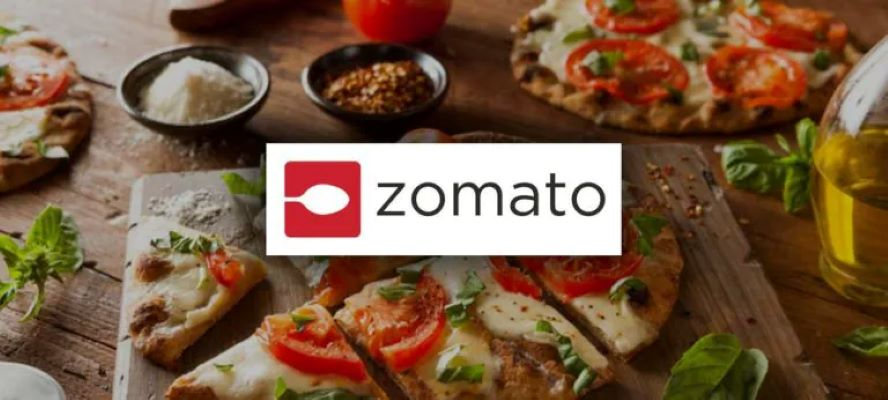

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [ ]:
df.head ()

In [ ]:
# We get a snapshot of the data — the column names, structure, and example values — to understand what type of information each column contains.

In [ ]:
df.shape 

In [ ]:
# This tells us the total number of records and features. Helps us understand dataset size. For example: (51717, 17) → 51k rows, 17 columns.hi

In [ ]:
df.size

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
# Shows how many missing values are in each column. This helps us decide:

# Which columns are too incomplete to use

# Which ones can be cleaned (e.g. rate, dish_liked)

# What needs to be dropped or filled

In [ ]:
df.columns

In [ ]:
# We get a list of all features present in the dataset.
# Useful for identifying columns to Keep, Rename, Drop (e.g. URL, phone).

# DATA CLEANING

In [ ]:
df.drop(['url', 'address', 'phone', 'reviews_list', 'menu_item', 'dish_liked'], axis=1, inplace=True)
df.columns

In [ ]:
# These columns are either too unstructured (like menu_item) or not relevant to business questions (like url, address). Dropping them simplifies analysis.

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

In [ ]:
# Duplicate rows don’t add any value to analysis and can bias our statistics. We remove them to ensure clean, non-repetitive data.

In [ ]:
df['rate'].unique()

In [ ]:
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = df['rate'].str.replace('/5', '', regex=False).astype(float)


In [ ]:
df['rate'].head(20)

In [ ]:
# Converts rate from messy strings like "4.1/5" or "NEW" into clean float values (e.g., 4.1). 
# This allows us to perform numeric operations like mean, histograms, comparisons.

In [ ]:
df.rename(columns={'approx_cost(for two people)': 'cost'}, inplace=True)


In [ ]:
df['cost'] = df['cost'].astype(str).str.replace(',', '').replace('nan', np.nan).astype(float)

In [ ]:
df['cost'].head(20)

In [ ]:
# Removes commas (like 1,200 → 1200) and converts cost into numeric format so we can do cost-based analysis.

In [ ]:
df.isnull().sum()

In [ ]:
df.fillna({'rest_type': 'Unknown', 'cuisines': 'Unknown', 'location': 'Unknown'}, inplace=True)


In [ ]:
df['rest_type'] = df['rest_type'].fillna('Unknown')
df['cuisines'] = df['cuisines'].fillna('Unknown')
df['location'] = df['location'].fillna('Unknown')


In [ ]:
# We fill missing values in key categorical columns so they don’t break groupby/visuals. 'Unknown' is better than dropping useful rows.

In [ ]:
df[['rest_type', 'cuisines', 'location']].head(10)


In [ ]:
df.dropna(subset=['rate', 'cost'], inplace=True)

In [ ]:
# These are core columns. If a row is missing both rating or cost, it won't help us with business decisions, so we drop them.

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df

# Data Visualization

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
Top 20 Locations with the Highest Number of Restaurants
</h2>



In [ ]:
location_counts = df['location'].value_counts().head(20)

In [ ]:
plt.figure(figsize=(15,7))

top_locations = df['location'].value_counts().head(20).index
filtered_df = df[df['location'].isin(top_locations)]

sns.countplot(x="location", data=filtered_df, order=top_locations, palette="viridis")

plt.xticks(rotation=45)
plt.title("Top 20 Restaurant Locations")
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.show()


In [ ]:
# Identifies the most competitive localities in Bengaluru like BTM, Koramangala, etc. Useful for restaurant placement strategy.

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
Most Common Restaurant Types
</h2>


In [ ]:
rest_type_counts = df['rest_type'].value_counts().head(10)

In [ ]:
plt.figure(figsize=(8, 5))
plt.barh(rest_type_counts.index, rest_type_counts.values, color='tomato')
plt.title('Top Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()


In [ ]:
# Shows the most common types of dining options (e.g., Quick Bites, Casual Dining, Cafes). This helps us understand the competitive landscape and user preferences.

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
Rating Distribution
</h2>

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=20, kde=True, color='darkorange')
plt.title('Distribution of Restaurant Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.show()


In [ ]:
# Visualizes how ratings are spread. Helps identify whether ratings are generally high, low, or skewed. 
# Most restaurants will likely be rated between 3.0 and 4.5.

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
Does Booking Table Feature Affect Rating?
</h2>

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x='book_table', y='rate', data=df, palette=['#F4A261', '#2A9D8F'])
plt.title('Impact of Table Booking on Ratings', fontsize=14)
plt.xlabel('Table Booking Available', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()
      

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
Distribution of Cost for Two People
</h2>

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cost'], bins=30, kde=True, color='#FF6F61', edgecolor='black', alpha=0.8)
plt.title('Cost Distribution', fontsize=14)
plt.xlabel('Cost (INR)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Understands typical price ranges. This tells you whether most restaurants are affordable or premium.

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
Most Common Cuisines Offered
</h2>

In [ ]:
cuisine_counts = df['cuisines'].value_counts().head(10)

In [ ]:
top_cuisines = df['cuisines'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Most Popular Cuisines in Bangalore')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.tight_layout()
plt.show()

In [ ]:
# North Indian and Chinese cuisines dominate Bangalore's restaurant scene.

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
Does Price Affect Ratings?
</h2>

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='cost', y='rate', data=df, hue='online_order', alpha=0.6, palette='Set1')
plt.title('Does Cost Influence Ratings?')
plt.xlabel('Cost for Two People')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# This analysis shows the correlation between price and customer rating.

# If there's a trend (e.g., high cost = high rating), pricing could affect perception.

# If there's no pattern, affordable places can still perform well.

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
Do Online Ordering Restaurants Get More Votes?
</h2>

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='online_order', y='votes', data=df, palette='Pastel1')
plt.title('Votes vs Online Ordering Availability')
plt.xlabel('Online Order')
plt.ylabel('Number of Votes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# A box plot showing vote distribution for restaurants with and without online ordering.
# "Yes" box is higher → customers prefer convenient delivery options and vote more for them.

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
Which Locations Have the Best Rated Restaurants?
</h2>

In [ ]:
location_rating = df.groupby('location')['rate'].mean().sort_values(ascending=False)
location_rating = location_rating[df['location'].value_counts() > 50].head(10)

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=location_rating.values, y=location_rating.index, palette='Blues_d')
plt.title('Top 10 Locations with Best Rated Restaurants')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.show()

In [ ]:
# Premium food zones attract loyal customers with high expectations — ideal locations for entrepren on quality dining.

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
 Are Some Restaurant Types Better Rated?
</h2>

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(
    x='rest_type', 
    y='rate', 
    data=filtered_df, 
    palette='viridis'
)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.title('Distribution of Ratings by Restaurant Type', fontsize=16, fontweight='bold')
plt.xlabel('Restaurant Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Helps assess if casual dining outperforms food courts in ratings — useful for selecting the right restaurant concept.

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
  Does Booking Table Feature Affect Rating ?
</h2>

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x='book_table', y='rate', data=df, palette='Set2', width=0.5)
plt.title('Table Booking vs Ratings', fontsize=14, weight='bold')
plt.xlabel('Table Booking Available', fontsize=12)
plt.ylabel('Avg Rating', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# We analyze whether restaurants that offer table bookings get better ratings. 
# A higher rating for "Yes" might indicate better service or more organized experience.

<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
  Insights
</h2>

1️⃣ **Dominant Restaurant Types** — Quick Bites, Casual Dining, and Cafes are most common due to affordability and fast service.

2️⃣ **Popular Locations**
— BTM, Koramangala, and Indiranagar have the highest restaurant density with strong ratings.

3️⃣ **Customer Ratings Behavior**
— Most ratings fall between 3.0 and 4.5. Pricing doesn’t strongly impact ratings — both affordable and premium restaurants perform well.

4️⃣ **Online Ordering Impact**
— Restaurants offering online ordering receive higher engagement, highlighting digital platforms' importance.

5️⃣ **Cuisine Trends**
— North Indian, Chinese, and South Indian cuisines dominate customer preferences. Multi-cuisine offerings are common and effective.

6️⃣ **Table Booking Effect**
— Table booking services contribute to higher customer satisfaction and slightly better ratings.




<h2 style="color:#FFFFFF; text-align:center; background:#E23744; border-radius:10px; padding:15px; font-family:'Segoe UI', Tahoma, sans-serif;">
  Recommendations for a New Restaurant in Bengaluru
</h2>

1️⃣ **Target Hot Locations** — Focus on areas like BTM, Indiranagar, Koramangala, and HSR Layout for high customer reach.

2️⃣ **Offer Popular Cuisines** — Prioritize North Indian, Chinese, South Indian, and Fast Food to attract diverse customers.

3️⃣ **Set Competitive Prices**  — Keep pricing around ₹200–₹400 per person to match customer expectations.

4️⃣ **Boost Online Presence** — Ensure online delivery & table booking options to increase visibility and convenience.

5️⃣ **Maintain High Ratings** — Focus on service quality to stay above 4.0 ratings.

6️⃣ **Explore Growth Areas** — Consider emerging neighborhoods with growing demand for early market advantage.